## Outlier Detection
For this homework, you will be implementing the outlier detection algorithm from class.

There are two subtasks. Each is worth 25 points, 15 for 
implementing the algorithm and 10 for getting the correct answer. Partial credit may be given and deductions may be taken.

### Honor Code Policy
This assignment is to be completed independently. You may discuss the assignment at a high level with your classmates, but may not share code or results.

In [82]:
import matplotlib.pyplot as plt

# Note: This instructs matplotlib to use a Jupyter Notebook backend for plotting.
%matplotlib inline

In [84]:
# THIS CELL NEEDS TO BE RUN TWICE (this cell and the next)
plt.rcParams["figure.figsize"] = 10, 6

In [85]:
plt.rcParams["figure.figsize"] = 10, 6

## brief aside on `heapq`

Python's `heapq` library ([documentation](https://docs.python.org/3.6/library/heapq.html), please read through this to understand what they are and how we store them in an array)
provides a heap interface to Python lists.

### what's a heap?

A heap is a tree-based data structure which satisfies the 
heap property:  

---

if $P$ is a parent of $C$, then the value of $P$ must be greater 
than or equal to the value of $C$

---

Also see:  
* https://en.wikipedia.org/wiki/Heap_(data_structure)
* https://www.tutorialspoint.com/data_structures_algorithms/heap_data_structure.htm
* https://www.geeksforgeeks.org/heap-data-structure/

## generate data

To generate some data with outliers for this exercise, we're going to sample some data from a 
distribution with known parameters, modify the parameters, and continue sampling to generate 
some outliers.  In particular, we'll sample our data from a 
[multi-variate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

In [86]:
import heapq as hq
import numpy as np
import time

In [87]:
from hashlib import md5

# Note: Random Number Generators (RNGs) aren't actually random; 
# we can all get the same results here if we use the same "seed".
#   For more details see: https://en.wikipedia.org/wiki/Pseudorandom_number_generator
seed = int(md5(b"DSCI302").hexdigest(), 16) % (2**32 - 1) # this just gets a valid seed in a fun way 
np.random.seed(seed)

In [88]:
def generate_data(dim = 100, num_points = 3000, num_outliers=20):
    """
    Generates some data with a the specified number of outliers.
    
    :param dim: the dimensionality of the data
    :param num_points: number of data points to generate
    :param num_outliers: number of outlierly data points to generate
    """
        
    # covariance matrix & mean vector
    covar = np.diag(np.ones(dim))
    mean = np.zeros(dim)

    # Sample num_points data points
    all_data = np.random.multivariate_normal(mean, covar, num_points)
    
    #now create the num_outliers outliers. Note that this code generates batches of points clustered around 
    #increasing means. The most outlierly points will start at index num_points. 
    for i in range (1, num_outliers):
        mean.fill(i)
        outlier_data = np.random.multivariate_normal (mean, covar, i)
        all_data = np.concatenate ((all_data, outlier_data))

    return all_data

this_num_points = 3000
this_num_outliers = 20
data100d = generate_data(dim=100, num_points = this_num_points, num_outliers = this_num_outliers)

### quick example in 2 dimensions

Let's take a look at what this looks like in 2 dimensions. 

In [89]:
data2d = generate_data(dim=2)

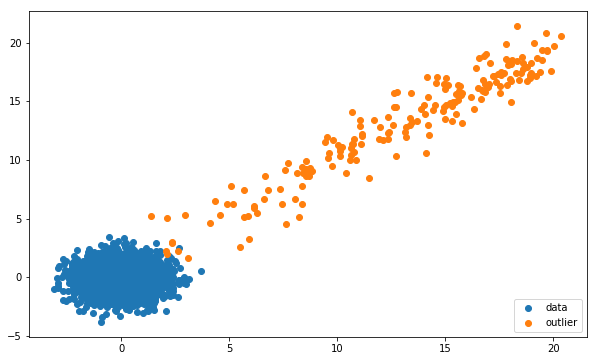

In [90]:
# plot all the data
plt.scatter(*data2d[0:this_num_points-1,:].T, label="data")
plt.scatter(*data2d[this_num_points:,:].T, label="outlier")
plt.legend(loc="lower right")

In [ ]:
# zoom in on the outliers
plt.scatter(*data2d[0:this_num_points,:].T, label="data")
plt.scatter(*data2d[this_num_points:this_num_points+4,:].T, label="outlier")
plt.legend(loc="lower right")

# Task 1 (25 points)


For this task, you will be asked to implement (in Python) the nested loops algorithm on slide 29 of the "outliers" lecture. Start with the code below, and fill in the appropriate missing code. To implement the priority queue, use Python's heapq. The distance between data points should be implemented using Euclidean distance (the $\ell_2$-norm).

You may find the numpy linear algebra function **norm** helpful. 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

## implementation (15 points)

In [ ]:
def get_outliers_slow(data, num_neigh = 10, num_outliers = 5):
    """
    Implement the nested loop outliers algorithm on slide 29 of the lecture.
    
    :param data: the data
    :param num_neigh: number of neighbors to use in knn detection
    :param num_outliers: number of outliers to return
    
    :return: a numpy array of dimension [num_outliers,] 
    storing pairs containing the each outlier and its index in the data 
    """
    
    # Feel free to change / use the above variables as you please, but
    # please return the outliers / indices as described in the docstring.
    
    # Priority Queue for the Outliers
    outliers = []
    # Array for the indices
    indices = []
    
    # TODO: Implement the nested loop outliers algo. and store the outliers and indices
        
    return np.array(outliers)

## time it! (correct output + reasonable time 15pt)

Note how we can time the execution of a cell simply by starting it with
`%%time`. A reasonable time is ~1-2 minutes.

In [ ]:
%%time

outliers100d = get_outliers_slow(data100d)

In [ ]:
outliers100d

In [ ]:
%%time

outliers2d = get_outliers_slow(data2d)

In [ ]:
outliers2d

### plot 2D data & predicted outliers

In [ ]:
plt.scatter(*data2d.T, label="data")
if len(outliers2d):
    plt.scatter(*outliers2d.T, label="predicted outlier")
plt.legend(loc="lower right")

# Task 2: Optimal Algorithm (25 points)

In this task, you should implement the faster algorithm on slide 32. Note that your implemetation should find the same outliers as in Task 1.

## implementation (15 points)

In [ ]:
def get_outliers_fast(data, num_neigh = 10, num_outliers = 5):
    """
    Implement the nested loop outliers algorithm on slide 32 of the lecture.
    
    :param data: the data
    :param num_neigh: number of neighbors to use in knn detection
    :param num_outliers: number of outliers to return
    
    :return: a numpy array of dimension [num_outliers,] storing the outliers
    and a numpy array of dimension [num_outliers,] storing the indices
    """
    
    # Feel free to change / use the following variables as you please, but
    # please return the outliers / indices as described in the docstring.
    
    # Priority Queue for the Outliers
    outliers = []
    # Array for the indices
    indices = []
    
    # TODO: Implement the fast outliers algo. and store the outliers & indices
    
    return np.array(outliers)

## time it! (correct output + reasonable time 10 points)

Note how we can time the execution of a cell simply by starting it with
`%%time`. A reasonable time is < 10 seconds.

In [ ]:
%%time

outliers2d = get_outliers_fast(data2d)

In [ ]:
outliers2d

In [ ]:
%%time

outliers100d = get_outliers_fast(data100d)

In [ ]:
outliers100d

### plot 2D data & predicted outliers

In [ ]:
plt.scatter(*data2d.T, label="data")
if len(outliers2d):
    plt.scatter(*outliers2d.T, label="predicted outlier")
plt.legend(loc="lower right")

Copyright ©  2019 Rice University, Christopher M Jermaine (cmj4@rice.edu), and Risa B Myers  (rbm2@rice.edu)

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.